### Simple hierarchical linear model (HLM) 
Evan Edwards

The HLM is: pvmath1 = 1 + female +  escs + random intercept for school



In [1]:
# Imports
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Load dataset
PISA2018 = pd.read_csv("pisa2018.BayesBook.csv")

In [3]:
# Data processing: converting categorical values to numerical values
PISA2018['Female'] = PISA2018['Female'].replace({'Female': 1, 'Male': 0})

In [4]:
# The formula, model defaults to random intercepts per group
formula = "PV1MATH ~ C(Female) + ESCS"

# Creating the model
model = smf.mixedlm(formula, groups=PISA2018['SchoolID'], data=PISA2018)

# Getting the fit model
result = model.fit()

# Printing the model summary
print(result.summary())

            Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  PV1MATH    
No. Observations:   4838     Method:              REML       
No. Groups:         164      Scale:               6265.9294  
Min. group size:    1        Log-Likelihood:      -28147.0585
Max. group size:    39       Converged:           Yes        
Mean group size:    29.5                                     
-------------------------------------------------------------
                Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
-------------------------------------------------------------
Intercept      471.624    2.961 159.303 0.000 465.822 477.427
C(Female)[T.1]   0.541    2.315   0.233 0.815  -3.997   5.078
ESCS            27.073    1.294  20.915 0.000  24.536  29.610
Group Var      991.297    1.800                              



In [5]:
# Creating the PV1MATH predictions using the model, and calculating the R^2 score and MSE as metrics of accuracy
pred = result.predict(PISA2018)

print(f'The R^2 score is: {r2_score(PISA2018["PV1MATH"], pred)}')
print(f'The MSE is: {mean_squared_error(PISA2018["PV1MATH"], pred)}')

The R^2 score is: 0.1418154052932752
The MSE is: 7214.687797694154


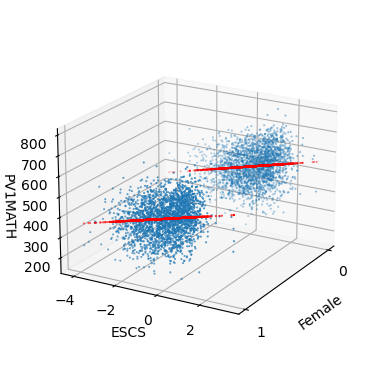

In [6]:
# Plotting the results in 3D, showing the predicted values in red
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=20, azim=30)
ax.scatter3D(PISA2018["Female"], PISA2018["ESCS"], PISA2018["PV1MATH"], s=0.2)
ax.scatter3D(PISA2018["Female"], PISA2018["ESCS"], pred, s=0.2, c="red")
ax.set_xlabel("Female")
ax.set_ylabel('ESCS')
ax.set_zlabel("PV1MATH")
ax.set_xticks([0, 1])
ax.set_box_aspect(None, zoom=0.85)
plt.show()